# Задача:

Имеется выборка некоторой случайной величины E в виде интервального статистического ряда:

| Интервал   | Частота |
|------------|---------|
| (150;175)  | 160     |
| (175;200)  | 340     |
| (200;225)  | 345     |
| (225;250)  | 135     |
| (250;275)  | 20      |

Требуется:

а) Построить гистограмму и график эмперической функции распределения F_n(x).

б) Вычислить выборочные: 
- среднее
- дисперсию
- медиану
- коэффициент
- вариации
- коэффициент асимметрии
- эксцесс.

в) Добавить искусственно к данным большую флуктуацию (порядка 1000). Как изменятся вычисленные параметры? Почему?


# Решение (Python):

## Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Интервальный статистический ряд


In [2]:
intervals = [(150, 175), (175, 200), (200, 225), (225, 250), (250, 275)]
frequencies = [160, 340, 345, 135, 20]

## Создание выборки из интервального статистического ряда


In [3]:
data = []
for interval, freq in zip(intervals, frequencies):
    value = (interval[0] + interval[1]) / 2  # среднее значение внутри интервала
    data.extend([value] * freq)  # повторяем значение freq раз

## Гистограмма


(array([0.032, 0.   , 0.   , 0.   , 0.   , 0.068, 0.   , 0.   , 0.   ,
        0.   , 0.069, 0.   , 0.   , 0.   , 0.   , 0.027, 0.   , 0.   ,
        0.   , 0.004]),
 array([162.5, 167.5, 172.5, 177.5, 182.5, 187.5, 192.5, 197.5, 202.5,
        207.5, 212.5, 217.5, 222.5, 227.5, 232.5, 237.5, 242.5, 247.5,
        252.5, 257.5, 262.5]),
 <BarContainer object of 20 artists>)

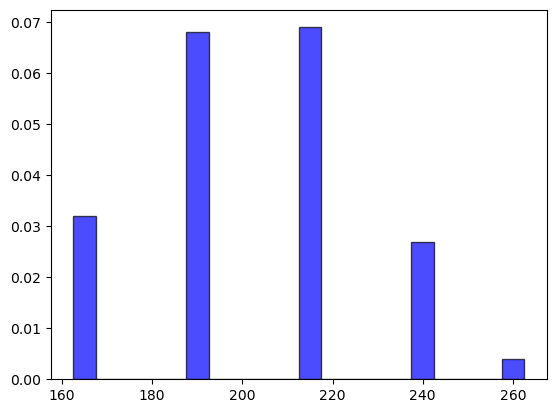

In [61]:
plt.hist(data, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')

## График эмпирической функции распределения


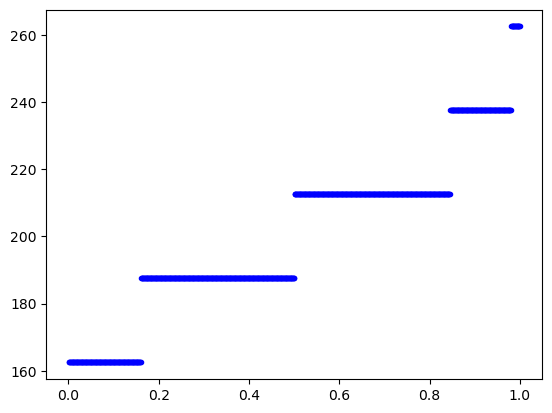

In [62]:
x = np.sort(data)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(y, x, marker='.', linestyle='none', color='blue')

## Вычисление статистических параметров выборки


In [63]:
mean = np.mean(data) # среднее
variance = np.var(data) # дисперсия
median = np.median(data) # медиана
cv = np.std(data) / np.mean(data)  # коэффициент вариации
skewness = stats.skew(data)  # коэффициент асимметрии
kurtosis = stats.kurtosis(data)  # эксцесс

In [64]:
print(f"**Статистические параметры для исходной выборки:**")
print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Медиана: {median}")
print(f"Коэффициент вариации: {cv}")
print(f"Коэффициент асимметрии: {skewness}")
print(f"Эксцесс: {kurtosis}")

**Статистические параметры для исходной выборки:**
Среднее: 200.375
Дисперсия: 599.859375
Медиана: 200.0
Коэффициент вариации: 0.12223095078640864
Коэффициент асимметрии: 0.19734340044143722
Эксцесс: -0.497665223450769


## Добавление большой флуктуации


In [83]:
intervals_with_fluct = [(150, 175), (175, 200), (200, 225), (225, 250), (250, 275), (975,1000)]
frequencies_with_fluct = [160, 340, 345, 135, 20, 1]

In [84]:
data_with_fluct = []
for interval, freq in zip(intervals_with_fluct, frequencies_with_fluct):
    value = (interval[0] + interval[1]) / 2  # среднее значение внутри интервала
    data_with_fluct.extend([value] * 50)  # повторяем значение freq раз

In [77]:
len(data_with_fluct)

1001

## Вычисление статистических параметров для выборки с большой флуктуацией


In [86]:
mean_fluctuation = np.mean(data_with_fluct)
variance_fluctuation = np.var(data_with_fluct)
median_fluctuation = np.median(data_with_fluct)
cv_fluctuation = np.std(data_with_fluct) / np.mean(data_with_fluct)
skewness_fluctuation = stats.skew(data_with_fluct)
kurtosis_fluctuation = stats.kurtosis(data_with_fluct)

print("\n**После добавления большой флуктуации:**")
print(f"Среднее: {mean_fluctuation}")
print(f"Дисперсия: {variance_fluctuation}")
print(f"Медиана: {median_fluctuation}")
print(f"Коэффициент вариации: {cv_fluctuation}")
print(f"Коэффициент асимметрии: {skewness_fluctuation}")
print(f"Эксцесс: {kurtosis_fluctuation}")

plt.show()


**После добавления большой флуктуации:**
Среднее: 341.6666666666667
Дисперсия: 84461.80555555553
Медиана: 225.0
Коэффициент вариации: 0.8506042923156978
Коэффициент асимметрии: 1.7394196461587734
Эксцесс: 1.1119690640088136
